In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import hvplot.pandas
%matplotlib inline

In [2]:
# import total production data for petroleum and alternative energy
total_energy_production = pd.read_csv("Total_Production.csv").reset_index()
total_energy_production.head(10)

,level_0,level_1,level_2,Report generated on: 02-08-2021 21:25:26
0,Series Key,INTL.4415-1-USA-QBTU.A,Series Key,INTL.4419-1-USA-QBTU.A
1,Series Name,Total energy production from petroleum and oth...,Series Name,"Total energy production from nuclear, renewabl..."
2,Units,QBTU,Units,QBTU
3,Frequency,A,Frequency,A
4,1980,20.474,1980,8.168
5,1981,20.412,1981,8.421
6,1982,20.458,1982,9.111
7,1983,20.528,1983,9.698
8,1984,21.082,1984,9.99
9,1985,21.196,1985,10.16


In [3]:
# drop the additional rows that do not contain data by year
total_energy_production.drop([0,1,2,3],inplace=True)
total_energy_production.head()

,level_0,level_1,level_2,Report generated on: 02-08-2021 21:25:26
4,1980,20.474,1980,8.168
5,1981,20.412,1981,8.421
6,1982,20.458,1982,9.111
7,1983,20.528,1983,9.698
8,1984,21.082,1984,9.99


In [4]:
# rename the columns to the correct names
total_energy_production.rename(columns={
    "level_0":"Year",
    "level_1":"Total petroleum energy production qBtu",
    "level_2":"Year2",
    "Report generated on: 02-08-2021 21:25:26":"Total alternative energy production qBtu"},inplace=True)
total_energy_production.head()

,Year,Total petroleum energy production qBtu,Year2,Total alternative energy production qBtu
4,1980,20.474,1980,8.168
5,1981,20.412,1981,8.421
6,1982,20.458,1982,9.111
7,1983,20.528,1983,9.698
8,1984,21.082,1984,9.99


In [5]:
# create separate dataframes
petroleum_production = total_energy_production.drop(columns=["Year2","Total alternative energy production qBtu"])
alternative_production = total_energy_production.drop(columns=["Year","Total petroleum energy production qBtu"]).rename(columns={"Year2":"Year"})

In [6]:
# check dtypes of columns to see if need to change
# petroleum_production.info()
# alternative_production.info()

In [24]:
# change dtypes for petroleum production dataframe
petroleum_production["Total petroleum energy production qBtu"] = petroleum_production["Total petroleum energy production qBtu"].astype("float")
petroleum_production["Year"] = petroleum_production["Year"].astype("int")
petroleum_production.set_index("Year",inplace=True)
petroleum_production.head()

,Total petroleum energy production qBtu
Year,
1980,20.474
1981,20.412
1982,20.458
1983,20.528
1984,21.082


In [25]:
# change dtypes for alternative production dataframe
alternative_production["Total alternative energy production qBtu"] = alternative_production["Total alternative energy production qBtu"].astype("float")
alternative_production["Year"] = alternative_production["Year"].astype("int")
alternative_production.set_index("Year",inplace=True)
alternative_production.head()

,Total alternative energy production qBtu
Year,
1980,8.168
1981,8.421
1982,9.111
1983,9.698
1984,9.990


In [26]:
# plot for yearly production for petroleum
petroleum_production.hvplot.line(title="Annual Energy Production from Petroleum")

:Curve   [Year]   (Total petroleum energy production qBtu)

In [27]:
# plot for yearly production of alternative energy
alternative_production.hvplot.line(title="Annual Energy Production from Alternative Energy")

:Curve   [Year]   (Total alternative energy production qBtu)

In [41]:
# create combined dataframe
combined_production = pd.concat([petroleum_production, alternative_production],axis="columns",join="inner")
combined_production.rename(columns={
    "Total petroleum energy production qBtu":"Production (Oil)",
    "Total alternative energy production qBtu":"Production (Alternative)"
},inplace=True)
combined_production.head()

,Production (Oil),Production (Alternative)
Year,,
1980,20.474,8.168
1981,20.412,8.421
1982,20.458,9.111
1983,20.528,9.698
1984,21.082,9.990


In [42]:
combined_correlation = combined_production.corr()
combined_correlation.head()

,Production (Oil),Production (Alternative)
Production (Oil),1.000000,0.079985
Production (Alternative),0.079985,1.000000


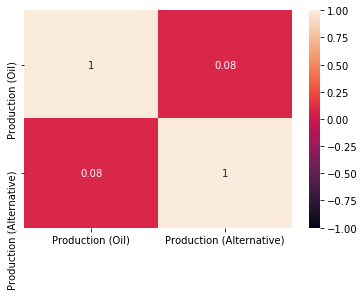

In [43]:
# plot correlation between production
sns.heatmap(combined_correlation,vmin=-1,vmax=1,annot=True)